# 1. Similitud Coseno (Sin Usar Kmeans)

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import numpy as np

In [2]:
# Listas de datos
x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]

In [3]:
# Función para calcular la similitud coseno entre dos puntos
def calcular_similitud_coseno(x1, y1, x2, y2):
    dot_product = x1 * x2 + y1 * y2
    norm1 = np.sqrt(x1 ** 2 + y1 ** 2)
    norm2 = np.sqrt(x2 ** 2 + y2 ** 2)
    return 1 - dot_product / (norm1 * norm2)

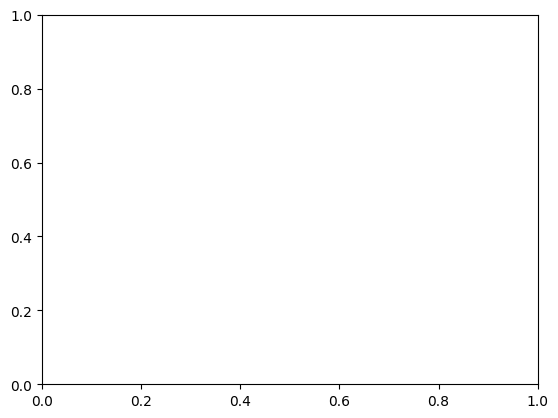

In [4]:
# Inicialización de datos y centroides
datos = [1, 2]
centroide1 = [x[0], y[0]]
centroide2 = [x[1], y[1]]
x1 = [x[0], x[1]]
y1 = [y[0], y[1]]

# Crear una figura para el gráfico
fig, ax = plt.subplots()

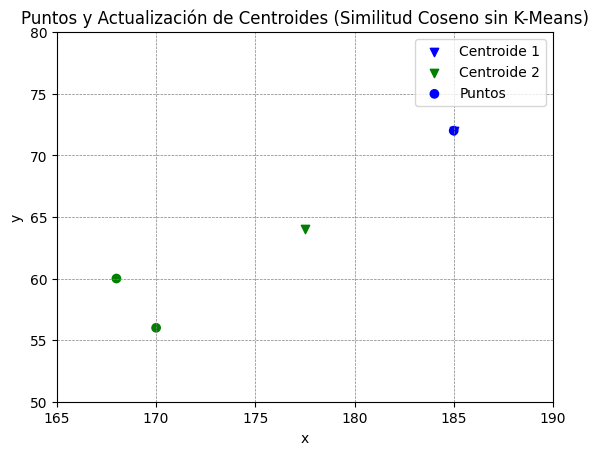

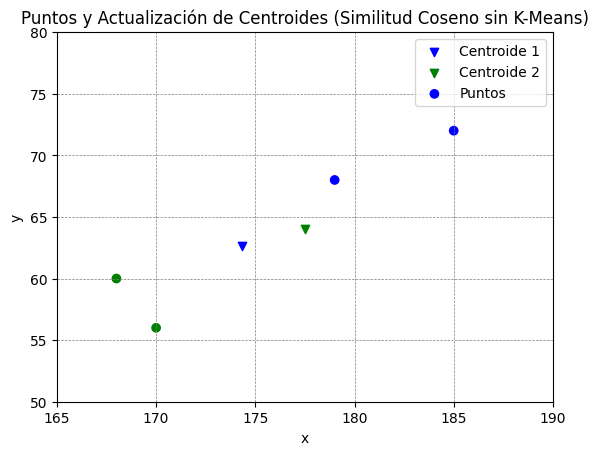

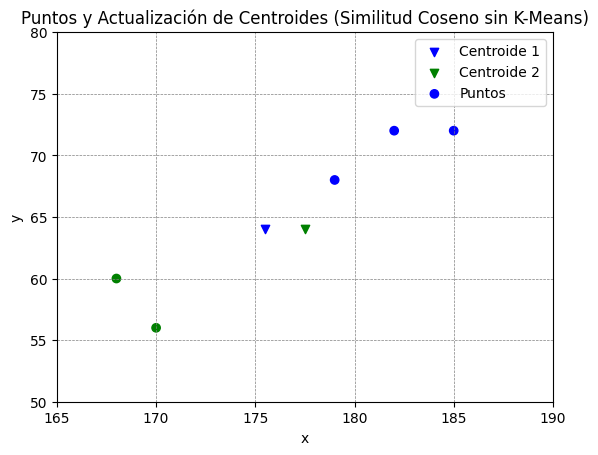

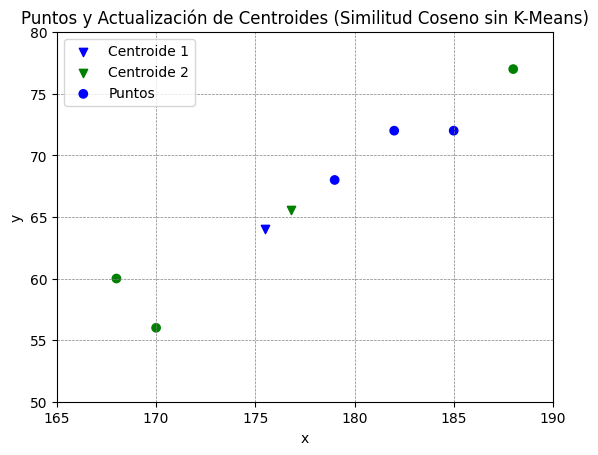

In [5]:
# Algoritmo de asignación y actualización de centroides
for i in range(2, len(x)):
    # Calcular las similitudes coseno entre puntos y centroides
    similitudes1 = [calcular_similitud_coseno(x[i], y[i], centroide1[0], centroide1[1]) for i in range(len(x1))]
    similitudes2 = [calcular_similitud_coseno(x[i], y[i], centroide2[0], centroide2[1]) for i in range(len(x1))]

    if np.mean(similitudes1) > np.mean(similitudes2):
        datos.append(1)
        centroide1 = [np.mean(x1), np.mean(y1)]
        x1.append(x[i])
        y1.append(y[i])
    else:
        datos.append(2)
        centroide2 = [np.mean(x1), np.mean(y1)]
        x1.append(x[i])
        y1.append(y[i])

    # Actualizar el gráfico en cada iteración
    plt.cla()
    plt.scatter(centroide1[0], centroide1[1], marker='v', color="blue", label='Centroide 1')
    plt.scatter(centroide2[0], centroide2[1], marker='v', color="green", label='Centroide 2')
    plt.scatter(x1, y1, color=["blue" if d == 1 else "green" for d in datos], label='Puntos')

    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Puntos y Actualización de Centroides (Similitud Coseno sin K-Means)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(165, 190)
    plt.ylim(50, 80)
    plt.legend()

    # Mostrar el gráfico en cada iteración
    plt.pause(1)

In [6]:
# Mostrar los resultados finales
print("Resultados finales:")
print("Datos:", datos)
print("Centroide 1:", centroide1)
print("Centroide 2:", centroide2)

# Mantener el gráfico visible
plt.show()

Resultados finales:
Datos: [1, 2, 2, 1, 1, 2]
Centroide 1: [175.5, 64.0]
Centroide 2: [176.8, 65.6]


# 2. Similitud Coseno (Usando Kmeans)

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

In [8]:
#Lista de Datos
x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]

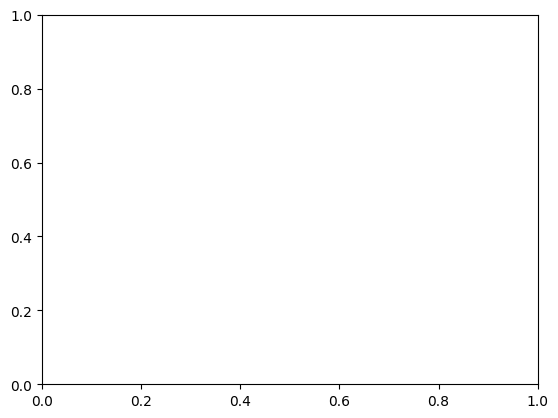

In [9]:
# Combinar las listas de coordenadas en un solo conjunto de datos
data = list(zip(x, y))

# Número de clústeres
num_clusters = 2

# Crear un modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Inicialización de datos y centroides
datos = [1, 2]
centroide1 = [x[0], y[0]]
centroide2 = [x[1], y[1]]
x1 = [x[0], x[1]]
y1 = [y[0], y[1]]

# Crear una figura para el gráfico
fig, ax = plt.subplots()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


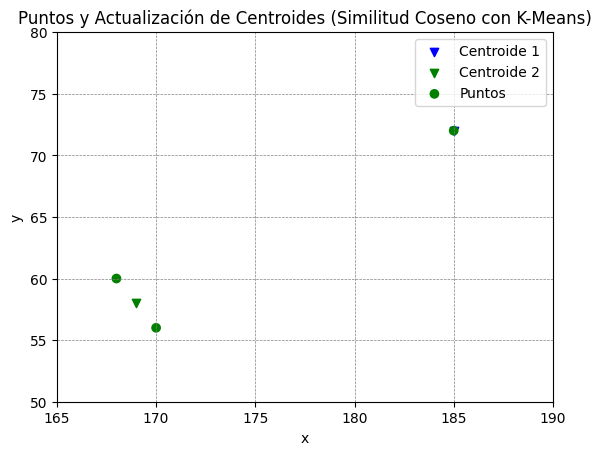

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


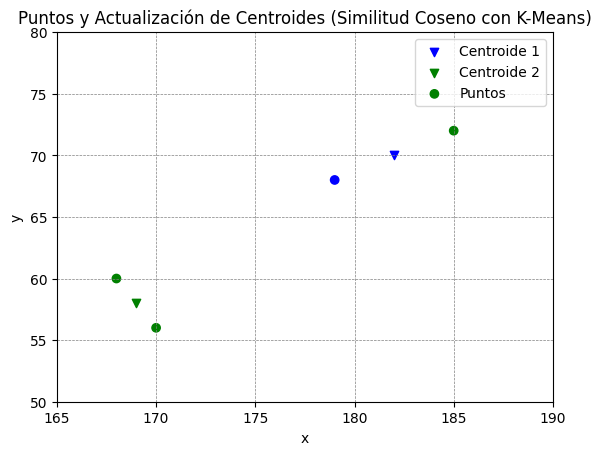

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


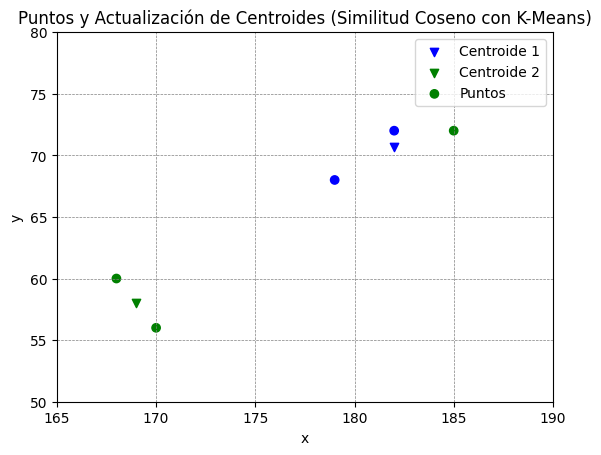

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


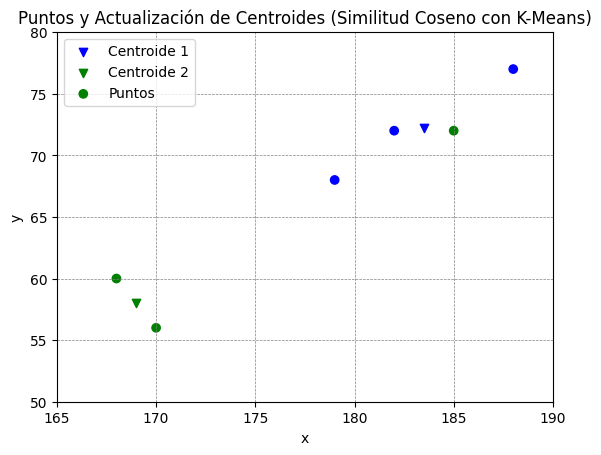

In [10]:
# Algoritmo de asignación y actualización de centroides
for i in range(2, len(x)):
    # Ajustar el modelo K-Means a los datos hasta la iteración actual
    kmeans.fit(data[:i+1])

    # Calcular las distancias coseno entre puntos y centroides
    distancias = pairwise_distances(data[:i+1], kmeans.cluster_centers_, metric='cosine')

    # Obtener las etiquetas de clúster asignadas a cada punto
    clusters = np.argmin(distancias, axis=1)

    # Obtener las coordenadas de los centroides
    centroides = kmeans.cluster_centers_

    # Actualizar los datos
    datos.append(clusters[i])
    centroide1 = centroides[0].tolist()
    centroide2 = centroides[1].tolist()
    x1.append(x[i])
    y1.append(y[i])

    # Actualizar el gráfico en cada iteración
    plt.cla()
    plt.scatter(centroide1[0], centroide1[1], marker='v', color="blue", label='Centroide 1')
    plt.scatter(centroide2[0], centroide2[1], marker='v', color="green", label='Centroide 2')
    plt.scatter(x1, y1, color=["blue" if d == 0 else "green" for d in datos], label='Puntos')

    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Puntos y Actualización de Centroides (Similitud Coseno con K-Means)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(165, 190)
    plt.ylim(50, 80)
    plt.legend()

    # Mostrar el gráfico en cada iteración
    plt.pause(1)

In [11]:
# Mostrar los resultados finales
print("Resultados finales:")
print("Datos:", datos)
print("Centroide 1:", centroide1)
print("Centroide 2:", centroide2)

# Mantener el gráfico visible
plt.show()

Resultados finales:
Datos: [1, 2, 1, 0, 0, 0]
Centroide 1: [183.5, 72.25]
Centroide 2: [169.0, 58.0]
